In [1]:
import torch
import numpy as np
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torch.utils.data import Dataset

### IMPORTED THE 10 POSITIVE FILES

In [2]:
positive_file1 = "/project/egultep_31/Healthcare/ENCFF109WDL_trimmedseq.txt"
positive_file2 = "/project/egultep_31/Healthcare/ENCFF168GAN_trimmedseq.txt"
positive_file3 = "/project/egultep_31/Healthcare/ENCFF522GCK_trimmedseq.txt"
positive_file4 = "/project/egultep_31/Healthcare/ENCFF684HWT_trimmedseq.txt"
positive_file5 = "/project/egultep_31/Healthcare/ENCFF691GMP_trimmedseq.txt"
positive_file6 = "/project/egultep_31/Healthcare/ENCFF762IIH_trimmedseq.txt"
positive_file7 = "/project/egultep_31/Healthcare/ENCFF797UUQ_trimmedseq.txt"
positive_file8 = "/project/egultep_31/Healthcare/ENCFF824LVP_trimmedseq.txt"
positive_file9 = "/project/egultep_31/Healthcare/ENCFF852UQF_trimmedseq.txt"
positive_file10 = "/project/egultep_31/Healthcare/ENCFF886LQP_trimmedseq.txt"

In [3]:
positive_files = [positive_file1, positive_file2, positive_file3, positive_file4, positive_file5, positive_file6, positive_file7, 
positive_file8, positive_file9, positive_file10]

In [4]:
#Defining function for concatenating the 10 positive files
def positive_files_concat(files):
    for file in files:
        with open(file, 'r') as infile:
            mainfile = infile.readlines()
            with open("positive_file.txt", "a") as f:
                f.writelines(mainfile)

### Concatenated all the 10 positive files into a single Positive file

In [5]:
positive_files_concat(positive_files)

### IMPORTED THE 10 NEGATIVE FILES

In [6]:
negative_file1 = "/project/egultep_31/Healthcare/ENCFF109WDL_negregion_neg_seq_neg_dna_seq.txt"
negative_file2 = "/project/egultep_31/Healthcare/ENCFF168GAN_negregion_neg_seq_neg_dna_seq.txt"
negative_file3 = "/project/egultep_31/Healthcare/ENCFF522GCK_negregion_neg_seq_neg_dna_seq.txt"
negative_file4 = "/project/egultep_31/Healthcare/ENCFF684HWT_negregion_neg_seq_neg_dna_seq.txt"
negative_file5 = "/project/egultep_31/Healthcare/ENCFF691GMP_negregion_neg_seq_neg_dna_seq.txt"
negative_file6 = "/project/egultep_31/Healthcare/ENCFF762IIH_negregion_neg_seq_neg_dna_seq.txt"
negative_file7 = "/project/egultep_31/Healthcare/ENCFF797UUQ_negregion_neg_seq_neg_dna_seq.txt"
negative_file8 = "/project/egultep_31/Healthcare/ENCFF824LVP_negregion_neg_seq_neg_dna_seq.txt"
negative_file9 = "/project/egultep_31/Healthcare/ENCFF852UQF_negregion_neg_seq_neg_dna_seq.txt"
negative_file10 = "/project/egultep_31/Healthcare/ENCFF886LQP_negregion_neg_seq_neg_dna_seq.txt"

In [7]:
negative_files = [negative_file1, negative_file2, negative_file3, negative_file4, negative_file5, negative_file6, negative_file7, 
negative_file8, negative_file9, negative_file10]

In [8]:
#Defining function for concatenating the 10 negative files
def negative_files_concat(negfiles):
    for negfile in negfiles:
        with open(negfile, 'r') as neg_file:
            ngfile = neg_file.readlines()
            with open("nega_file.txt", "a") as nf:
                nf.writelines(ngfile)

### Concatenated all the 10 Negative files into a single Negative file

In [9]:
negative_files_concat(negative_files)

### CREATING POSITIVE LABELLED FILE

In [10]:
pos_file = "/project/egultep_31/Healthcare/positive_file.txt"

with open(pos_file, 'r') as posfile:
    # for file in posfile:
    positi_file = posfile.readlines()

with open("positive_label_file.txt", 'w') as plf:
    for line in positi_file:
        cleanline = line.strip()
        plf.write(cleanline + ' ' + '1' + '\n')

### CREATING NEGATIVE LABELLED FILE

In [11]:
nega_file = "/project/egultep_31/Healthcare/nega_file.txt"

with open(nega_file, 'r') as ngf:
    negati_file = ngf.readlines()

with open("negative_label_file.txt", 'w') as nlf:
    for negline in negati_file:
        clean_negfile = negline.strip()
        nlf.write(clean_negfile + ' ' + '0' + '\n')

## COMBINED FILE 

In [12]:
positive_labelled_file = "/project/egultep_31/Healthcare/positive_label_file.txt"
negative_labelled_file = "/project/egultep_31/Healthcare/negative_label_file.txt"

combined_files = [positive_labelled_file, negative_labelled_file]

for singlefile in combined_files:
    with open(singlefile, 'r') as sf:
        readfile = sf.read()
        with open("combined_labelled_file.txt", 'a') as clf:
            clf.write(readfile)



In [13]:
combined_file = "/project/egultep_31/Healthcare/combined_labelled_file.txt"

with open(combined_file, 'r') as cf:
    readcombinedfile = cf.readlines()

combinedfilearray = np.array(readcombinedfile)

In [14]:

datafile, labelfile = [], []
for line in readcombinedfile:
    parts = line.strip().split()
    if len(parts) > 1:
        datafile.append(parts[0])  
        labelfile.append(int(parts[1]))  

# Convert data to uppercase
lowerdatafile = [x.upper() for x in datafile]

# One-hot encoding
DNA_dict = {'A': 0, 'T': 1, 'G': 2, 'C': 3}
DNA_one_hot = []
for line in lowerdatafile:
    sequence_length = len(line)
    sequence_one_hot = [[0] * sequence_length for _ in range(len(DNA_dict))]
    for i, char in enumerate(line):
        if char in DNA_dict:
            nucleotide_index = DNA_dict[char]
            sequence_one_hot[nucleotide_index][i] = 1
    DNA_one_hot.append(sequence_one_hot)

# Convert to PyTorch tensors
DNA_one_hot = np.array(DNA_one_hot)
tensor_data = [torch.tensor(seq, dtype=torch.float32) for seq in DNA_one_hot]
label_tensor = torch.tensor(labelfile, dtype=torch.long)

### Defining data class

In [15]:
class data_class(Dataset):
    def __init__(self, dnatensor_sequences, label_tensors):
        self.dnatensor_sequences = dnatensor_sequences
        self.label_tensors = label_tensors

    def __getitem__(self, index):
        dnasequence_tensor = self.dnatensor_sequences[index]
        dnalabel_tensor = self.label_tensors[index]
        return dnasequence_tensor, dnalabel_tensor

In [16]:
class lengthofdataset:
    def __init__(self, dataset, length):
        self.dataset = dataset
        self.length = length

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        return self.dataset[index]

### Splitting the dataset

In [17]:
dna_dataset = data_class(tensor_data, label_tensor)

len_dataset = len(dna_dataset.dnatensor_sequences)
length_dataset = lengthofdataset(dna_dataset, len_dataset)


tr_data = int(0.8 * len_dataset)
ts_data = len_dataset- tr_data
tr_dataset, ts_dataset = random_split(length_dataset, [tr_data, ts_data])

print(tr_data)
print(ts_data)

1739025
434757


In [18]:
CLASSES = 2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


### Defining Alexnet Architecture

In [19]:
class AlexNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=4, out_channels=96, kernel_size=11, stride=4)
        self.local_response1 = nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2)
        self.pool1 = nn.MaxPool1d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv1d(in_channels=96, out_channels=256, kernel_size=5, padding=2)
        self.local_response2 = nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2)
        self.pool2 = nn.MaxPool1d(kernel_size=3, stride=2)
        self.conv3 = nn.Conv1d(in_channels=256, out_channels=384, kernel_size=3, padding=1)
        self.conv4 = nn.Conv1d(in_channels=384, out_channels=384, kernel_size=3, padding=1)
        self.conv5 = nn.Conv1d(in_channels=384, out_channels=256, kernel_size=3, padding=1)
        self.pool5 = nn.MaxPool1d(kernel_size=3, stride=2)
        self.fc1 = nn.Linear(in_features=2304, out_features=4096)
        self.fc2 = nn.Linear(in_features=4096, out_features=4096)
        self.fc3 = nn.Linear(in_features=4096, out_features=2)

    def forward(self, x):
        # print("Input shape:", x.shape)
        x = self.pool1(F.relu(self.local_response1(self.conv1(x))))
         # print("After pool1:", x.shape)
        x = self.pool2(F.relu(self.local_response2(self.conv2(x))))
        # print("After pool2:", x.shape)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool5(F.relu(self.conv5(x)))
        # print("Before flatten:", x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        # print("After flatten:", x.shape)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, 0.5, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, 0.5, training=self.training)
        x = self.fc3(x)
        return x

### Defining the Network-in-Network Architecture

In [20]:
class MLPConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super().__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride=stride, padding=padding)
        self.mlp1 = nn.Conv1d(out_channels, out_channels, kernel_size=1)
        self.mlp2 = nn.Conv1d(out_channels, out_channels, kernel_size=1)
    
    def forward(self, x):
        x = F.relu(self.conv(x))
        x = F.relu(self.mlp1(x))
        x = F.relu(self.mlp2(x))
        return x

class NiNNet(nn.Module):
    def __init__(self):
        super().__init__()
        # First MLP Conv block
        self.block1 = MLPConv(in_channels=4, out_channels=96, kernel_size=11, stride=4)
        self.pool1 = nn.MaxPool1d(kernel_size=3, stride=2)
        
       
        self.block2 = MLPConv(in_channels=96, out_channels=256, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool1d(kernel_size=3, stride=2)
        
        
        self.block3 = MLPConv(in_channels=256, out_channels=384, kernel_size=3, padding=1)
        
        # Fourth MLP Conv block
        self.block4 = MLPConv(in_channels=384, out_channels=256, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool1d(kernel_size=3, stride=2)
        
        # Global Average Pooling
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        
        # Final classification layer (linear)
        self.classifier = nn.Linear(256, 2) 
        
        # Dropout
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.pool1(self.block1(x))
        x = self.pool2(self.block2(x))
        x = self.block3(x)
        x = self.pool4(self.block4(x))
        
        
        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 
        
        # Dropout before classification
        x = self.dropout(x)
        x = self.classifier(x)
        
        return x

## TRAINING THE MODEL FOR ALEXNET, NIN, PLOTTING THE CURVES, CREATING CONFUSION MATRIX FOR EACH MODEL 


Running AlexNet-SGD...

AlexNet-SGD - Epoch 1/10
AlexNet-SGD - Accuracy: 87.97%

AlexNet-SGD - Epoch 2/10
AlexNet-SGD - Accuracy: 87.89%

AlexNet-SGD - Epoch 3/10
AlexNet-SGD - Accuracy: 88.59%

AlexNet-SGD - Epoch 4/10
AlexNet-SGD - Accuracy: 88.63%

AlexNet-SGD - Epoch 5/10
AlexNet-SGD - Accuracy: 88.98%

AlexNet-SGD - Epoch 6/10
AlexNet-SGD - Accuracy: 89.11%

AlexNet-SGD - Epoch 7/10
AlexNet-SGD - Accuracy: 89.09%

AlexNet-SGD - Epoch 8/10
AlexNet-SGD - Accuracy: 89.13%

AlexNet-SGD - Epoch 9/10
AlexNet-SGD - Accuracy: 88.98%

AlexNet-SGD - Epoch 10/10
AlexNet-SGD - Accuracy: 89.51%

Running AlexNet-Adam...

AlexNet-Adam - Epoch 1/10
AlexNet-Adam - Accuracy: 88.94%

AlexNet-Adam - Epoch 2/10
AlexNet-Adam - Accuracy: 89.10%

AlexNet-Adam - Epoch 3/10
AlexNet-Adam - Accuracy: 89.84%

AlexNet-Adam - Epoch 4/10
AlexNet-Adam - Accuracy: 91.00%

AlexNet-Adam - Epoch 5/10
AlexNet-Adam - Accuracy: 92.68%

AlexNet-Adam - Epoch 6/10
AlexNet-Adam - Accuracy: 94.25%

AlexNet-Adam - Epoch 7/10

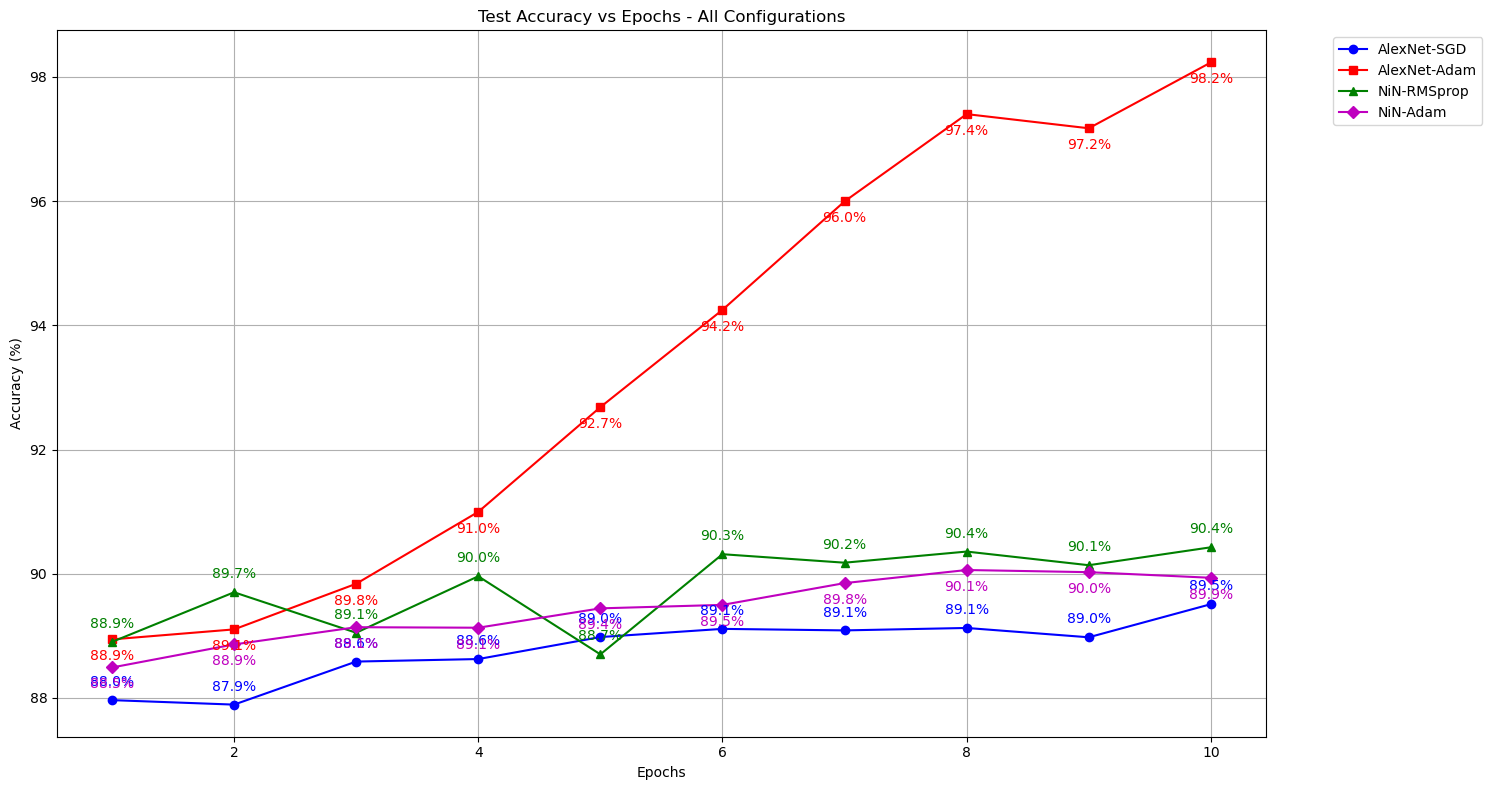

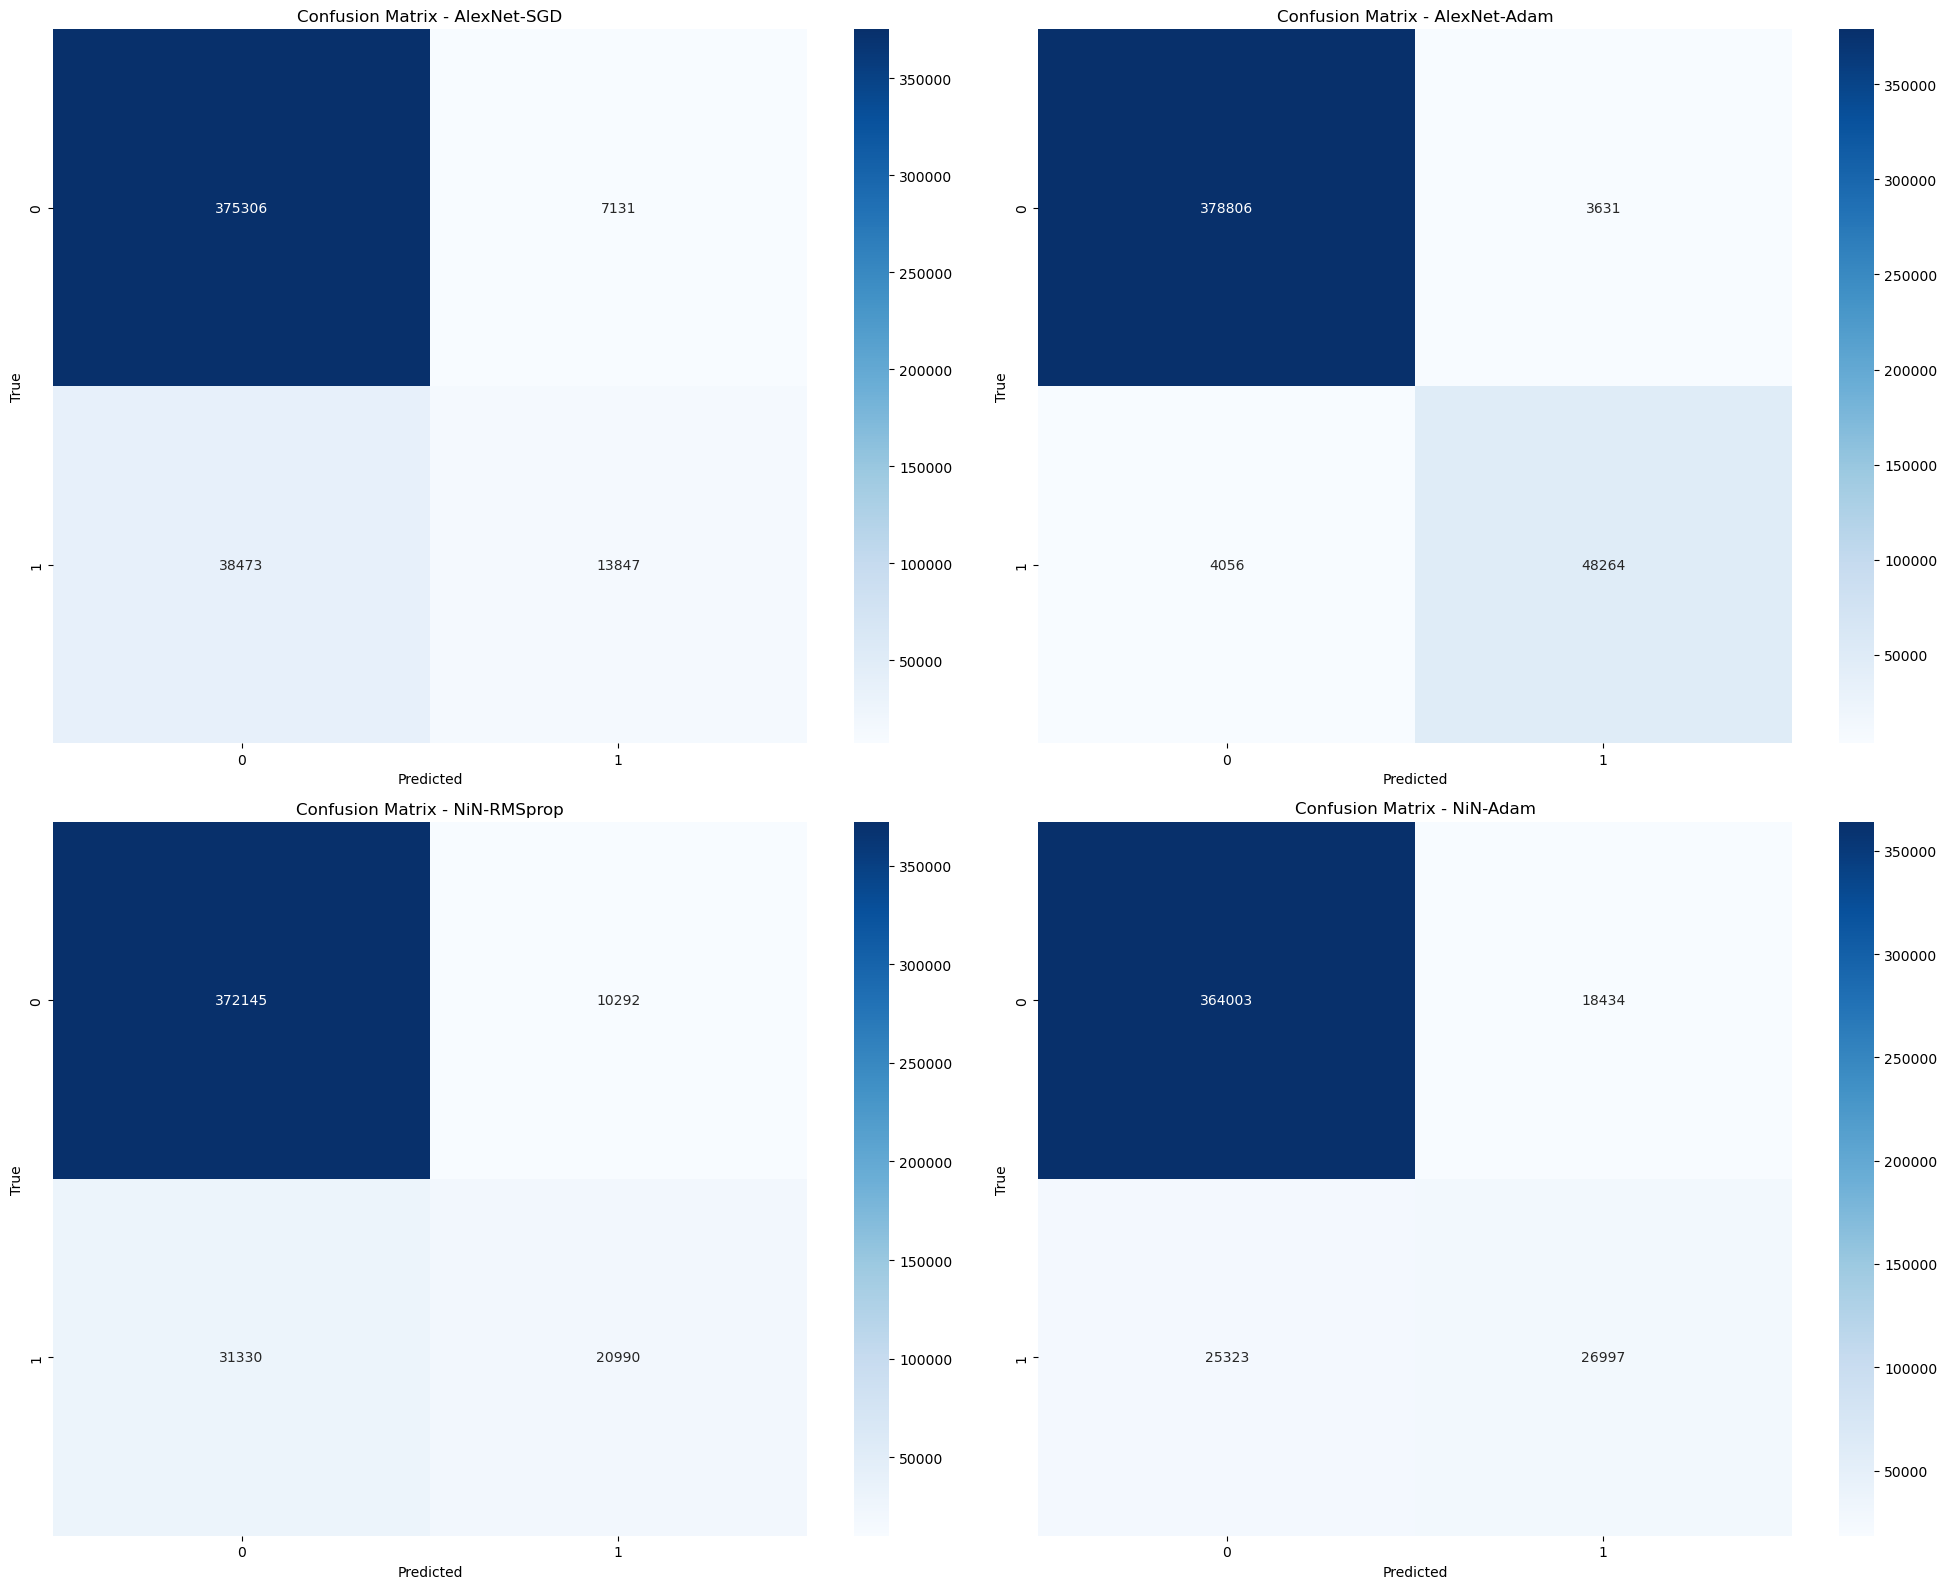

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def run_experiment(config, tr_dataset, ts_dataset, device):
    """Run a single experiment with given configuration"""
    train_loader = DataLoader(tr_dataset, batch_size=config['batch_size'], shuffle=True)
    test_loader = DataLoader(ts_dataset, batch_size=config['batch_size'], shuffle=False)
    
    # Initialize the model based on architecture
    if config['architecture'] == 'AlexNet':
        model = AlexNet().to(device)
    else:
        model = NiNNet().to(device)
    
    # Initialize the optimizer
    if config['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'])
    elif config['optimizer'] == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=config['learning_rate'], momentum=0.9)
    else:
        optimizer = optim.SGD(model.parameters(), lr=config['learning_rate'], momentum=0.9)
    
    accuracies = []
    final_predictions = None
    final_true_labels = None
    
    for epoch in range(1, config['epochs'] + 1):
        print(f"\n{config['name']} - Epoch {epoch}/{config['epochs']}")
        
        # Define Train model
        model.train()
        total_loss = 0
        for batch_idx, (img, classes) in enumerate(train_loader):
            img, classes = img.to(device), classes.to(device)
            optimizer.zero_grad()
            output = model(img)
            loss = nn.CrossEntropyLoss()(output, classes)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        # Define Test model
        model.eval()
        correct = 0
        predictions = []
        true_labels = []
        
        with torch.no_grad():
            for img, classes in test_loader:
                img, classes = img.to(device), classes.to(device)
                output = model(img)
                _, predicted = torch.max(output, 1)
                correct += (predicted == classes).sum().item()
                predictions.extend(predicted.cpu().numpy())
                true_labels.extend(classes.cpu().numpy())
        
        accuracy = 100. * correct / len(test_loader.dataset)
        accuracies.append(accuracy)
        print(f"{config['name']} - Accuracy: {accuracy:.2f}%")
        
        if epoch == config['epochs']:
            final_predictions = predictions
            final_true_labels = true_labels
    
    return accuracies, final_predictions, final_true_labels


# Plot accuracy curves for all configurations
def plot_all_results(results_list, configs):
    plt.figure(figsize=(15, 8))
    colors = ['b', 'r', 'g', 'm']
    markers = ['o', 's', '^', 'D']
    
    for i, (results, config) in enumerate(zip(results_list, configs)):
        plt.plot(range(1, config['epochs'] + 1), results[0], 
                color=colors[i], label=config['name'], 
                marker=markers[i])
        

        for epoch, acc in enumerate(results[0], 1):
            plt.annotate(f'{acc:.1f}%', 
                        (epoch, acc),
                        textcoords="offset points",
                        xytext=(0, 10 if i % 2 == 0 else -15),
                        ha='center',
                        color=colors[i])
    
    plt.title('Test Accuracy vs Epochs - All Configurations')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Plot confusion matrices for all configurations
def plot_all_confusion_matrices(results_list, configs):
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.ravel()
    
    for i, (results, config) in enumerate(zip(results_list, configs)):
        cm = confusion_matrix(results[2], results[1])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix - {config["name"]}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('True')
    
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':

    # Define the Configurations
    configs = [
        {
            'name': 'AlexNet-SGD',
            'architecture': 'AlexNet',
            'batch_size': 256,
            'learning_rate': 0.001,
            'epochs': 10,
            'optimizer': 'SGD'
        },
        {
            'name': 'AlexNet-Adam',
            'architecture': 'AlexNet',
            'batch_size': 1032,
            'learning_rate': 0.0001,
            'epochs': 10,
            'optimizer': 'Adam'
        },
        {
            'name': 'NiN-RMSprop',
            'architecture': 'NiN',
            'batch_size': 516,
            'learning_rate': 0.0005,
            'epochs': 10,
            'optimizer': 'RMSprop'
        },
        {
            'name': 'NiN-Adam',
            'architecture': 'NiN',
            'batch_size': 1032,
            'learning_rate': 0.0001,
            'epochs': 10,
            'optimizer': 'Adam'
        }
    ]
    

    results_list = []
    for config in configs:
        print(f"\nRunning {config['name']}...")
        results = run_experiment(config, tr_dataset, ts_dataset, device)
        results_list.append(results)
    
    plot_all_results(results_list, configs)
    
    plot_all_confusion_matrices(results_list, configs)